# Labels
- Throw away some of the atoms
        - For example H atoms in RCOMe
    
- Treat some atoms as R
        - For example the two C atoms in ArCI
        
First, plot the first fragments and their labels.      


In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
central_groups = ["RCOMe", "RNO2", "REt", "ArCI", "NO3", "RC6F5", "H2O", "RC6H5"]
contact_groups = ["ArCH", "C2CH2", "CCH3", "CF", "R2CO", "RC6H5", "RCN", "XH", "XH"]

contact_groups = ["ArCH"]

In [3]:
def plot_fragment_with_labels(central_group, contact_group):
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        
        if information[0] in atoms:
            dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False
    
    xs,ys,zs = [], [], []
    for key, value in dictionary.items():
        xs.append(value[0])
        ys.append(value[1])
        zs.append(value[2])
        
    centroid = [np.mean(xs), np.mean(ys), np.mean(zs)]
    
    for key, value in dictionary.items():
        dictionary[key][0] = dictionary[key][0] - centroid[0]
        dictionary[key][1] = dictionary[key][1] - centroid[1]
        dictionary[key][2] = dictionary[key][2] - centroid[2]
        
    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
        
        if 'H' in atom:
            color = 'grey'
            label = 'H'
        elif 'O' in atom:
            color='red'
            label = 'O'
        elif 'F' in atom:
            color='orchid'
            label = 'F'
        elif 'N' in atom:
            color='blue'
            label = 'N'
        else:
            color = 'black'
            label ='C'

        ax.scatter(x,y,z, s=100, edgecolors="black", color=color)

        ax.text(x+0.1, y+0.1, z+0.1, labels[i])
        
    # make cubic
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()
    
    print(xlim,ylim,zlim)
    lim_min, lim_max = min(xlim[0],ylim[0],zlim[0]), max(xlim[1],ylim[1],zlim[1])
    
    ax.set_xlim((lim_min, lim_max))
    ax.set_ylim((lim_min, lim_max))
    ax.set_zlim((lim_min, lim_max))
        
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.axis('off')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  '] 
 ['O1', 'C2', 'C3', 'N1', 'H2', 'H3', 'H4']


<IPython.core.display.Javascript object>


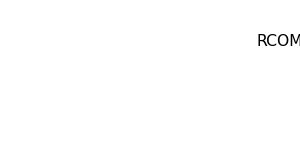

(-1.3309582857142859, 1.5949097142857136) (-0.9132215000000004, 1.2089315) (-1.5155027857142858, 1.8764242142857142)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O11', 'N4', 'O12', 'O13']


<IPython.core.display.Javascript object>


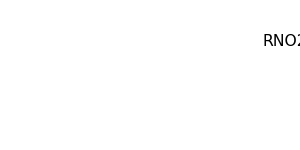

(-1.0525835, 0.9372285000000001) (-0.8185790000000004, 1.0548089999999994) (-0.6906710000000013, 0.6613609999999998)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  '] 
 ['C103', 'H82', 'H83', 'H84', 'C102', 'H81', 'H80', 'C101']


<IPython.core.display.Javascript object>


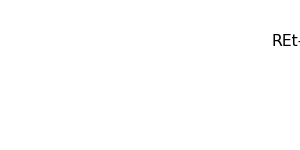

(-2.04399975, 1.6562572500000003) (-1.396255, 1.4589599999999996) (-1.4443960000000011, 1.4125460000000007)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  '] 
 ['I1', 'C14', 'C13', 'C15', 'H9', 'H10']


<IPython.core.display.Javascript object>


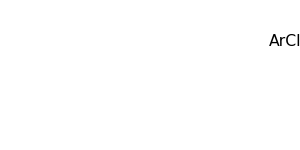

(-2.018894, 1.762664) (-0.894656, 0.7233559999999996) (-1.1893051666666663, 1.7202718333333324)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O12', 'N4', 'O13', 'O11']


<IPython.core.display.Javascript object>


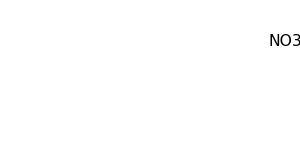

(-1.0525835, 0.9372285000000001) (-0.8185790000000004, 1.0548089999999994) (-0.6906710000000013, 0.6613609999999998)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1D', 'C2', 'C1E', 'C1', 'C1A', 'C2D', 'F2D', 'F1E', 'F1D', 'F1A', 'F2', 'F1']


<IPython.core.display.Javascript object>


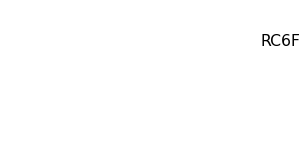

(-2.330702, 2.330702) (-2.943655, 2.943655) (-1.065471, 1.065471)
['LAB1  ', 'LAB2  ', 'LAB3  '] 
 ['H27', 'O5', 'H28']


<IPython.core.display.Javascript object>


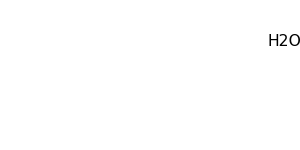

(-0.2785416666666665, 0.30808833333333335) (-0.21409866666666677, 0.25586533333333306) (-0.7163731666666663, 0.6508498333333331)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C7', 'C8', 'C13', 'C12', 'C11', 'C10', 'C9', 'H10', 'H9', 'H8', 'H7', 'H6']


<IPython.core.display.Javascript object>


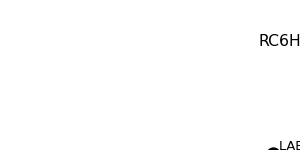

(-2.3257825000000003, 2.3258425000000007) (-2.181560166666666, 2.1254568333333337) (-1.3300008333333322, 1.3007591666666674)


In [4]:
for central_group in central_groups:
    for contact_group in contact_groups:

        plot_fragment_with_labels(central_group, contact_group)

### Now plot the things as how the "user" has defined them
In reality, this is still a script, but it could be implemented in a GUI.

In [5]:
definitions = pd.read_csv('../data/central_groups.csv')
display(definitions)

,name,center_label,y_axis_label,xy_plane_label,not_R,R,bin
0,ArCI,LAB1,LAB2,LAB3,LAB3-LAB4,LAB5-LAB6,-
1,NO3,LAB1,LAB2,LAB3,-,-,-
2,H2O,LAB3,LAB2,LAB1,-,-,-
3,RCOMe,LAB1,LAB2,LAB3,-,LAB4,LAB5-LAB6-LAB7
4,RC6H5,LAB2,LAB4,LAB6,-,LAB1,-
5,RC6H5b,LAB1,LAB2,LAB3,-,LAB1,-
6,RC6H5c,LAB1,LAB4,LAB6,-,LAB1,-
7,RC6F5,LAB1,LAB2,LAB3,-,LAB12,-
8,RNO2,LAB1,LAB2,LAB3,-,LAB1,-
9,REt,LAB1,LAB5,LAB8,-,LAB8,LAB2-LAB3-LAB4


In [6]:
def plot_fragment_with_user_labels(central_group, contact_group, definitions):
    row = definitions.loc[definitions.name == central_group]
    print(row)
    
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
                
        if labels[i].strip() in row.bin.item().split('-'):
            ax.scatter(x,y,z, color='grey', marker='x')
        elif labels[i].strip() in row.R.item().split('-'):
            ax.scatter(x,y,z, color='lightgreen', marker='o')
        else:
            ax.scatter(x,y,z, color='blue')
            
        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

    name center_label y_axis_label xy_plane_label not_R     R             bin
3  RCOMe         LAB1         LAB2           LAB3     -  LAB4  LAB5-LAB6-LAB7
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7'] 
 ['O1', 'C2', 'C3', 'O4', 'H25', 'H24', 'H23']


<IPython.core.display.Javascript object>


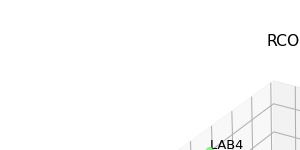

   name center_label y_axis_label xy_plane_label not_R     R bin
8  RNO2         LAB1         LAB2           LAB3     -  LAB1   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4'] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


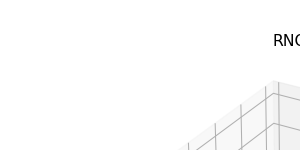

  name center_label y_axis_label xy_plane_label not_R     R             bin
9  REt         LAB1         LAB5           LAB8     -  LAB8  LAB2-LAB3-LAB4
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8'] 
 ['C97', 'H71', 'H70', 'H69', 'C98', 'H73', 'H72', 'C99']


<IPython.core.display.Javascript object>


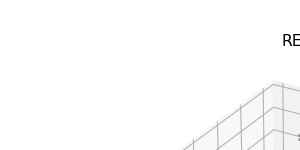

   name center_label y_axis_label xy_plane_label      not_R          R bin
0  ArCI         LAB1         LAB2           LAB3  LAB3-LAB4  LAB5-LAB6   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  '] 
 ['I1', 'C19', 'C20', 'C24', 'H1', 'H5']


<IPython.core.display.Javascript object>


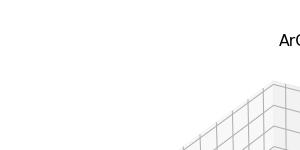

  name center_label y_axis_label xy_plane_label not_R  R bin
1  NO3         LAB1         LAB2           LAB3     -  -   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


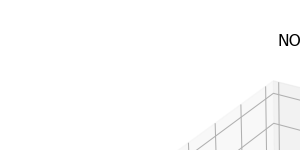

    name center_label y_axis_label xy_plane_label not_R      R bin
7  RC6F5         LAB1         LAB2           LAB3     -  LAB12   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1D', 'C2', 'C1E', 'C1', 'C1A', 'C2D', 'F2D', 'F1E', 'F1D', 'F1A', 'F2', 'F1']


<IPython.core.display.Javascript object>


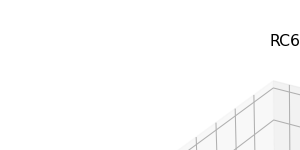

  name center_label y_axis_label xy_plane_label not_R  R bin
2  H2O         LAB3         LAB2           LAB1     -  -   -
['LAB1  ', 'LAB2  ', 'LAB3  '] 
 ['H45', 'O15', 'H46']


<IPython.core.display.Javascript object>


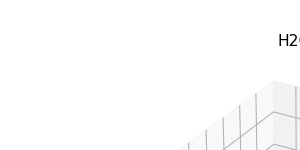

    name center_label y_axis_label xy_plane_label not_R     R bin
4  RC6H5         LAB2         LAB4           LAB6     -  LAB1   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1', 'C7', 'C12', 'C11', 'C10', 'C9', 'C8', 'H11', 'H10', 'H9', 'H8', 'H7']


<IPython.core.display.Javascript object>


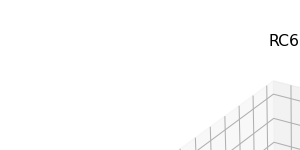

In [7]:
for central_group in central_groups:
    plot_fragment_with_user_labels(central_group, "CF", definitions)